<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
ml=pd.read_csv('malaria.csv')
ml.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
x=ml.dropna(how='all')
x
print('There are',ml.shape[0]-x.shape[0],'number of records with no data')

There are 4 number of records with no data


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
y=100-(ml.count()/ml.shape[0]*100)>60
y[y==True].index

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
z=100-(ml.count()/ml.shape[0]*100)
c=z[:8][:4]
d=z[8:17][:4]
e=c.values+d.values
c.index[list(e).index(e.max())].split('_')[1]

'Nigeria'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

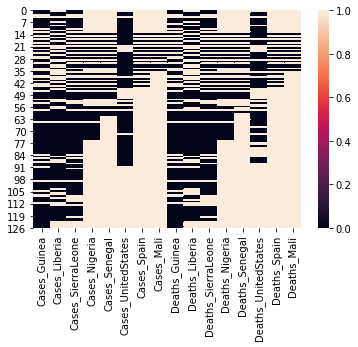

In [86]:
sns.heatmap(ml.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
ml.dropna(thresh=2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
ml.dropna(thresh=60,axis=1)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [223]:
ml['Cases_Liberia'].fillna(ml['Cases_Liberia'].median(),inplace=True)
ml

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.000000,2335.337349,10030.0,NaN,NaN,14.068493,NaN,NaN,1786.00000,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.000000,2335.337349,9780.0,NaN,NaN,14.068493,NaN,NaN,1781.00000,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.000000,8166.000000,9722.0,NaN,NaN,20.000000,NaN,NaN,1767.00000,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,911.064516,8157.000000,NaN,NaN,NaN,10.000000,NaN,NaN,563.23913,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,911.064516,2335.337349,NaN,NaN,NaN,14.068493,NaN,NaN,563.23913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.000000,8.000000,6.0,NaN,NaN,14.068493,NaN,NaN,66.00000,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.000000,2335.337349,NaN,NaN,NaN,14.068493,NaN,NaN,62.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.000000,2335.337349,NaN,NaN,NaN,14.068493,NaN,NaN,60.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.000000,2335.337349,NaN,NaN,NaN,14.068493,NaN,NaN,59.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [218]:
ml['Cases_UnitedStates'].fillna(ml['Cases_UnitedStates'].mean(),inplace=True)
ml

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.000000,NaN,10030.0,NaN,NaN,14.068493,NaN,NaN,1786.00000,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.000000,NaN,9780.0,NaN,NaN,14.068493,NaN,NaN,1781.00000,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.000000,8166.0,9722.0,NaN,NaN,20.000000,NaN,NaN,1767.00000,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,911.064516,8157.0,NaN,NaN,NaN,10.000000,NaN,NaN,563.23913,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,911.064516,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,563.23913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.000000,8.0,6.0,NaN,NaN,14.068493,NaN,NaN,66.00000,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.000000,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,62.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.000000,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,60.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.000000,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,59.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [211]:
df1=ml[['Cases_Guinea','Deaths_Guinea']]
df1.fillna(ml[['Cases_Guinea','Deaths_Guinea']].mean(),inplace=True)
ml[['Cases_Guinea','Deaths_Guinea']]=df1[['Cases_Guinea','Deaths_Guinea']]
ml

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.000000,NaN,10030.0,NaN,NaN,14.068493,NaN,NaN,1786.00000,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.000000,NaN,9780.0,NaN,NaN,14.068493,NaN,NaN,1781.00000,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.000000,8166.0,9722.0,NaN,NaN,20.000000,NaN,NaN,1767.00000,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,911.064516,8157.0,NaN,NaN,NaN,10.000000,NaN,NaN,563.23913,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,911.064516,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,563.23913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.000000,8.0,6.0,NaN,NaN,14.068493,NaN,NaN,66.00000,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.000000,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,62.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.000000,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,60.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.000000,NaN,NaN,NaN,NaN,14.068493,NaN,NaN,59.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
ho=pd.read_csv('house.csv')
ho.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

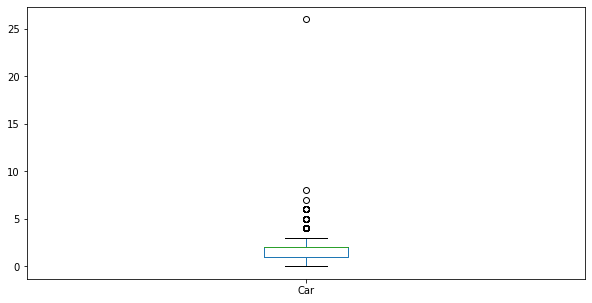

In [228]:
plt.figure(figsize=(10,5))
ho['Car'].plot(kind='box')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

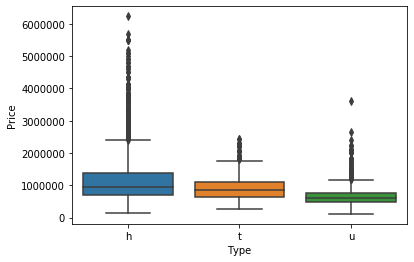

In [232]:
sns.boxplot(ho['Type'],ho['Price'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [249]:
q1=ho['Rooms'].quantile(0.25)
q2=ho['Rooms'].quantile(0.5)
q3=ho['Rooms'].quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ho[(ho['Rooms']>ul) | (ho['Rooms']<ll)]['Rooms'].values[0]

8

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

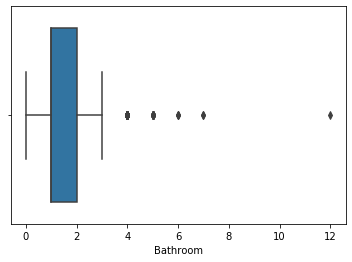

In [262]:
sns.boxplot(ho['Bathroom'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

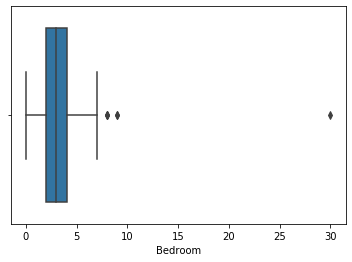

In [261]:
sns.boxplot(ho['Bedroom'])
plt.show()

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

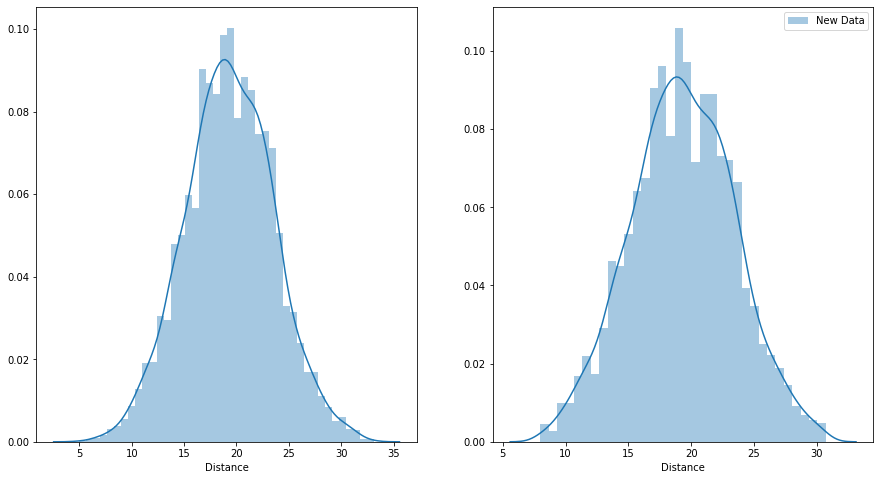

In [101]:
q1=ho['Distance'].quantile(0.25)
q3=ho['Distance'].quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
c_d=ho[(ho['Distance']<ul)]
cleaned_data=c_d[c_d['Distance']>ll]
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.distplot(ho['Distance'],ax=axes[0],label='Original Data')
sns.distplot(cleaned_data['Distance'],ax=axes[1],label='New Data')
plt.legend()
plt.show()

In [109]:
print(ho['Distance'].mean())
print(cleaned_data['Distance'].mean())

# Hence it is clear that there is not a major difference between the average distance of outlier treated data
# and the normal data.

19.32834662190515
19.311425554382247


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

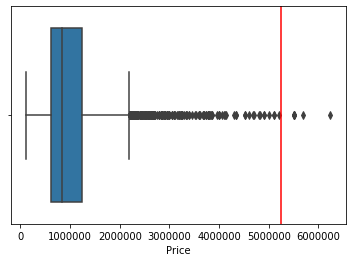

In [14]:
sns.boxplot(ho['Price'])
ul=5250000
plt.axvline(ul,color='r')
q1=ho['Price'].quantile(0.25)
q3=ho['Price'].quantile(0.75)
iqr=q3-q1

# 5250000=q3+(k*iqr)
# k value will be 6.41 if we want to increase the UL upto 5250000.

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
q1=ho['Distance'].quantile(0.25)
q1=ho['Distance'].quantile(0.25)
q3=ho['Distance'].quantile(0.75)
ho['GLabel']=0
for i in range(0,ho.shape[0]):
    if (ho['Distance'][i]<=q1):
        ho['GLabel'][i]='D'
    if (ho['Distance'][i]>q1) & (ho['Distance'][i]<=q3):
        ho['GLabel'][i]='B'
    if ho['Distance'][i]>q3:
        ho['GLabel'][i]='C'
ho

C:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,GLabel
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,C
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,B
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,B
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,B
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,B
...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,B
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,D
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,C
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,C


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Average price of Group Label C= 1019705.6008547009
Average price of Group Label B= 1012830.0062761506
Average price of Group Label D= 1032823.3358208955


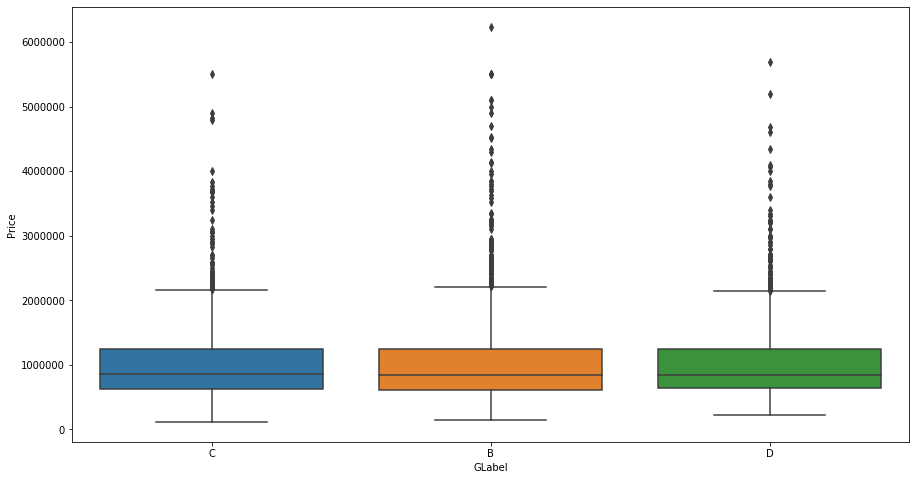

In [17]:
print('Average price of Group Label C=',ho[ho['GLabel']=='C'].mean()['Price'])
print('Average price of Group Label B=',ho[ho['GLabel']=='B'].mean()['Price'])
print('Average price of Group Label D=',ho[ho['GLabel']=='D'].mean()['Price'])
plt.figure(figsize=(15,8))
sns.boxplot(ho['GLabel'],ho['Price'])
plt.show()

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
from sklearn.model_selection import train_test_split

In [18]:
x=ho.drop('Price',axis=1)
y=ho['Price']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)

In [20]:
x_train

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
1960,4,h,VB,Western Metropolitan,1,1,371,21.9,3
1085,2,u,SP,Northern Metropolitan,2,1,404,18.3,3
4139,3,h,S,Western Metropolitan,1,1,395,13.5,2
1834,1,u,PI,Northern Metropolitan,2,1,934,18.5,5
1721,4,h,S,Southern Metropolitan,1,1,0,13.9,3
...,...,...,...,...,...,...,...,...,...
1033,4,t,VB,Southern Metropolitan,3,2,745,19.0,3
3264,4,h,SP,Western Metropolitan,1,2,0,21.4,4
1653,2,h,S,Southern Metropolitan,1,1,654,24.6,2
2607,4,h,S,Northern Metropolitan,1,1,0,12.9,3


In [21]:
x_test

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
125,3,h,S,Eastern Metropolitan,1,1,0,17.8,2
1941,3,h,S,Southern Metropolitan,1,1,241,19.1,3
4682,3,h,VB,Western Metropolitan,1,1,558,9.9,2
1351,3,u,S,Southern Metropolitan,1,0,153,17.4,2
1387,4,h,PI,Northern Metropolitan,2,1,316,15.0,5
...,...,...,...,...,...,...,...,...,...
2362,2,u,VB,Southern Metropolitan,1,1,0,11.3,1
1267,3,h,PI,Western Metropolitan,1,1,1233,17.8,2
1490,2,u,S,Southern Metropolitan,2,4,602,17.3,3
3073,8,u,PI,Northern Metropolitan,3,2,543,25.3,2


In [22]:
y_train

1960     650000
1085     620000
4139    1200000
1834     400000
1721    1408000
         ...   
1033    1400000
3264    1225000
1653     995000
2607     870000
2732     950000
Name: Price, Length: 3812, dtype: int64

In [23]:
y_test

125     1260000
1941    2009000
4682    2400000
1351    1275000
1387     622000
         ...   
2362     550000
1267    1500000
1490     592000
3073    2250000
3938    3180000
Name: Price, Length: 954, dtype: int64